In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, precision_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
from sklearn import tree


Loading the training data of the 

In [100]:
X_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/X_train.csv")
y_train = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/y_train.csv")
X_test =  pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/X_test.csv")
y_test = pd.read_csv("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/y_test.csv")
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,80,74,11,60,30.0,0.527,22
1,2,119,0,0,0,19.6,0.832,72
2,10,115,0,0,0,0.0,0.261,30
3,1,181,78,42,293,40.0,1.258,22
4,4,97,60,23,0,28.2,0.443,22


In [101]:
rf = RandomForestClassifier(n_estimators=100,random_state = 0, class_weight='balanced')
search_space = {
    'max_depth': [4, 8],
    'min_samples_leaf': [4,6]
}
rf_grid = GridSearchCV(rf, search_space, cv=5, scoring='precision').fit(X_train, y_train)
print("Value attempt 1:",rf_grid.score(X_test,y_test))


/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

Value attempt 1: 0.6805555555555556


/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [102]:
y_pred = rf_grid.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

Classification report for this classifier

In [103]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       120
           1       0.73      0.68      0.71        72

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.78      0.79      0.78       192



In [104]:
best_rf_model = rf_grid.best_estimator_
best_rf_model

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [105]:
features_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X_train.columns, columns=['Importance'])
features_importances

,Importance
Pregnancies,0.064706
Glucose,0.290406
BloodPressure,0.060580
SkinThickness,0.069593
Insulin,0.066868
BMI,0.158818
DiabetesPedigreeFunction,0.108981
Age,0.180049


In [106]:
rf = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')
search_space = {
    'n_estimators': [100, 200],
    'max_depth': [4, 8],
    'min_samples_leaf': [4, 6],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']

}
rf_grid = GridSearchCV(rf, search_space, cv=5, scoring='precision').fit(X_train, y_train.values)
print("Value attemp 2:",rf_grid.score(X_test,y_test))


/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/nandapop/Library/Python/3.8/lib/python/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d a

Value attemp 2: 0.6805555555555556


In [107]:
best_rf_model_2 = rf_grid.best_estimator_
best_rf_model_2

RandomForestClassifier(class_weight='balanced', max_depth=8, min_samples_leaf=4,
                       random_state=0)

In [108]:
feature_importances = pd.DataFrame(best_rf_model_2.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances

,Importance
Glucose,0.290406
Age,0.180049
BMI,0.158818
DiabetesPedigreeFunction,0.108981
SkinThickness,0.069593
Insulin,0.066868
Pregnancies,0.064706
BloodPressure,0.060580


In [109]:
mse = mean_squared_error(y_test, y_pred)
mse

0.21354166666666666

In [110]:

precision = precision_score(y_test, y_pred)
precision

0.6805555555555556

In [111]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7864583333333334

In [112]:
f1_score = f1_score(y_test, y_pred)
f1_score

0.7050359712230216

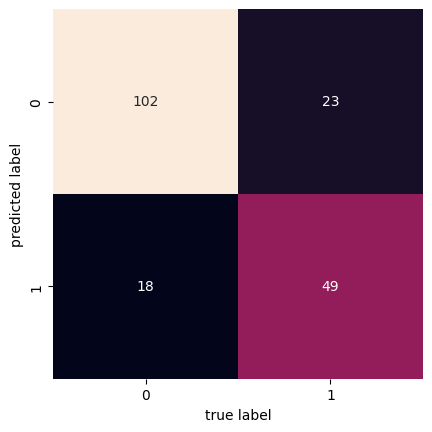

In [116]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/confusion_matrix.png")
plt.show()

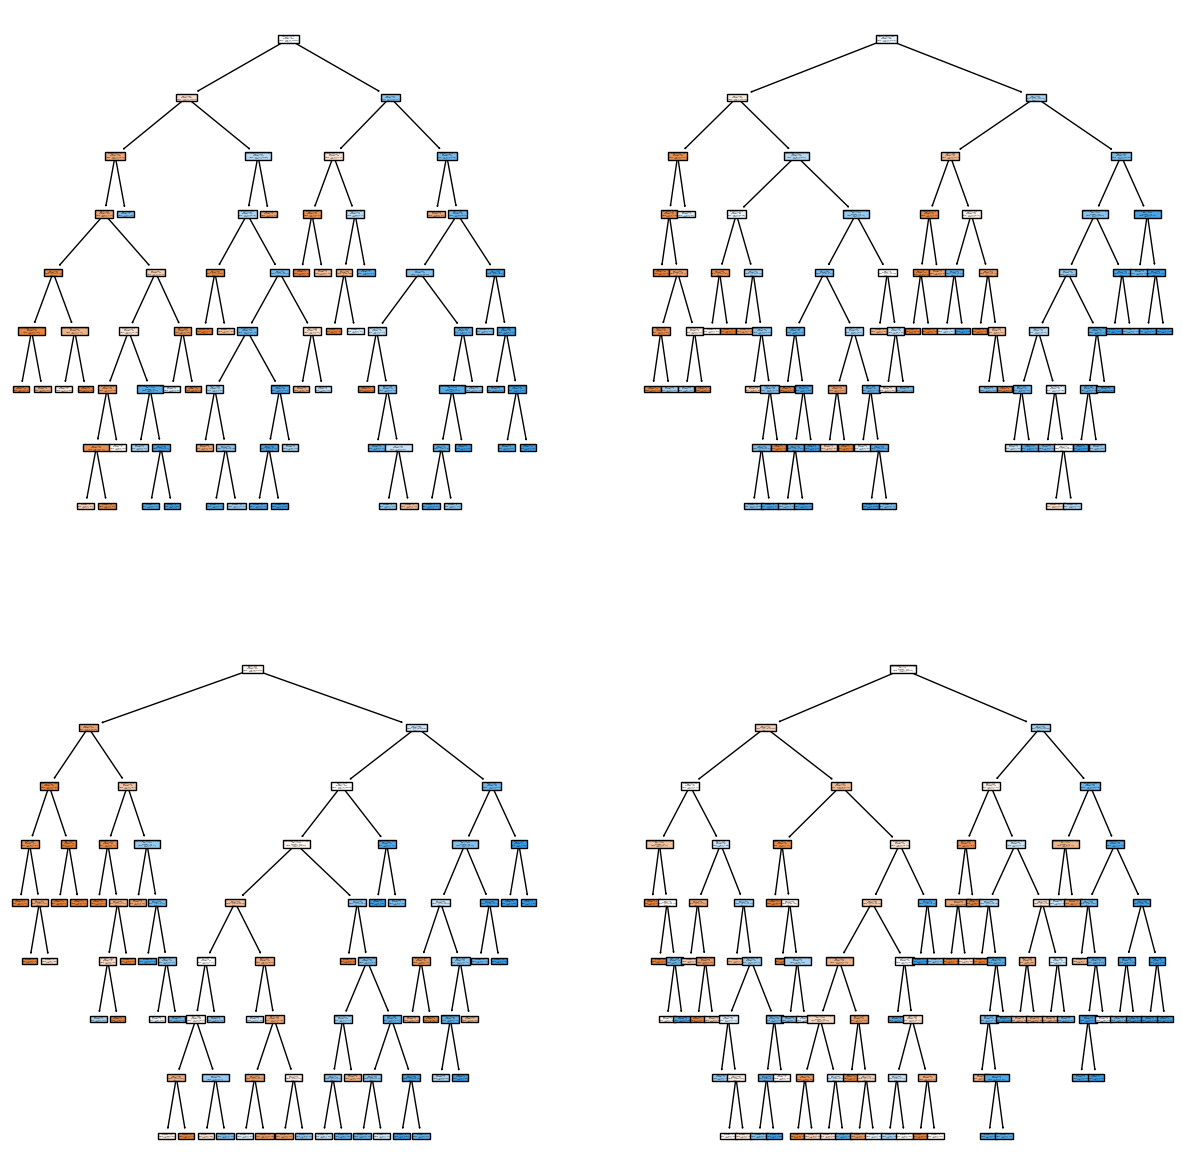

In [117]:
fig, axis = plt.subplots(2, 2, figsize=(15, 15))

tree.plot_tree(best_rf_model_2.estimators_[0], ax=axis[0, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(best_rf_model_2.estimators_[1], ax=axis[0, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(best_rf_model_2.estimators_[2], ax=axis[1, 0], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
tree.plot_tree(best_rf_model_2.estimators_[3], ax=axis[1, 1], feature_names=list(X_train.columns), class_names=["0", "1"], filled=True)
plt.savefig("/Users/nandapop/Documents/Bootcamp/gradientBoosting/data/processed/model_chosen_tree.png")
plt.show()


In [115]:
dump(rf_grid, open("/Users/nandapop/Documents/Bootcamp/random_forest_project/data/processed/random_forest_regressor_default_0.sav", "wb"))